# Exploratory Data Analysis: Philadelphia-Housing

### Before Data preprocessing:

In [4]:
#import statements
import pandas as pd 
import numpy as np 
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

# import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import pickle
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [5]:
url = 'https://opendata-downloads.s3.amazonaws.com/opa_properties_public.csv'
Data = pd.read_csv(url)
print(data.shape)
Data.head()

(581195, 78)


,objectid,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,census_tract,central_air,cross_reference,date_exterior_condition,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,garage_spaces,garage_type,general_construction,geographic_ward,homestead_exemption,house_extension,house_number,interior_condition,location,mailing_address_1,mailing_address_2,mailing_care_of,mailing_city_state,mailing_street,mailing_zip,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,off_street_open,other_building,owner_1,owner_2,parcel_number,parcel_shape,quality_grade,recording_date,registry_number,sale_date,sale_price,separate_utilities,sewer,site_type,state_code,street_code,street_designation,street_direction,street_name,suffix,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,unit,utility,view_type,year_built,year_built_estimate,zip_code,zoning,pin,lat,lng
0,100673955,2022-03-08 14:14:58,NaN,SWC REED ST,53764990.0,SR,VACANT LAND RESIDE < ACRE,14,NaN,32.0,NaN,NaN,NaN,NaN,58800.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,1413,NaN,1413L S TAYLOR ST,100 W OXFORD ST E-2300,NaN,NaN,PHILADELPHIA PA,NaN,19122,58800.0,NaN,NaN,NaN,NaN,NaN,2824.0,NaN,MAMIE NICHOLS LIMITED PARTERSHIP,NaN,886000014,E,NaN,2021-12-02 00:00:00,10S23 37,2020-12-10 00:00:00,1.0,NaN,NaN,NaN,PA,76780,ST,S,TAYLOR,L,0.0,0.0,F,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,19146.0,RSA5,1001681386,-75.185151,39.934839
1,100673956,NaN,A,SEC 6TH ST,53706565.0,CA0,APTS 5-50 UNITS MASONRY,1,Single Family,156.0,Y,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,A,NaN,0.0,B,18.0,NaN,NaN,516,1.0,516 W MONTGOMERY AVE,NaN,NaN,NaN,PHILADELPHIA PA,NaN,19122-2942,NaN,NaN,NaN,1.0,5.0,2.0,NaN,NaN,"ISAAC, SAMUEL",NaN,888182186,E,NaN,2021-12-01 00:00:00,014N010176,2021-06-12 00:00:00,211159.0,C,NaN,NaN,PA,56760,AVE,W,MONTGOMERY,NaN,NaN,NaN,F,1.0,942.0,A,NaN,6,NaN,I,2019.0,NaN,19122.0,NaN,1001678870,-75.144309,39.978491
2,100673957,2022-03-08 16:29:25,NaN,NWC 12TH + VINE ST,53909192.0,JS0,AMUSE NITECLB/DISCO MASON,14,NaN,376.0,NaN,NaN,NaN,NaN,5793600.0,2077400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1201,NaN,1201 VINE ST,NaN,NaN,NaN,WESTON CT,NaN,06883,7871000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERITIS GROUP LLC,NaN,881000117,E,NaN,2021-11-30 00:00:00,2N24 401,2021-08-09 00:00:00,1.0,NaN,NaN,NaN,CT,80120,ST,NaN,VINE,NaN,0.0,0.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19107.0,CMX4,1001680487,-75.158757,39.957900
3,100673958,2022-01-21 14:07:35,NaN,"213'4"" N FAIRMOUNT",53909113.0,SR,VACANT LAND RESIDE < ACRE,14,NaN,109.0,NaN,NaN,NaN,NaN,0.0,216600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,723,NaN,723 N 35TH ST,1635 MARKET ST SUITE 1600,NaN,NaN,PHILADELPHIA PA,NaN,19103,216600.0,NaN,NaN,NaN,NaN,NaN,988.0,NaN,MANTUA VENTURE LIMITED LIABILTY COMPANY,NaN,881000204,E,NaN,2021-11-30 00:00:00,057N240105,2021-11-23 00:00:00,1.0,NaN,NaN,NaN,PA,88480,ST,N,35TH,NaN,0.0,0.0,A,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,19104.0,RM1,1001681540,-75.193330,39.966899
4,100673959,2022-03-11 14:45:57,NaN,79' W 42ND ST,53908900.0,AA0,STORE 1 STY MASONRY,14,NaN,87.0,NaN,NaN,NaN,NaN,0.0,1491600.0,NaN,NaN,NaN,NaN,NaN,NaN,A,27.0,NaN,NaN,4211,NaN,4211 CHESTNUT ST,109 BAY HILL DRIVE,NaN,NaN,BLUE BELL PA,NaN,19422,1491600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4211 CHESTNUT LLC,NaN,881000132,E,B,2021-11-30 00:00:00,NaN,2021-08-13 00:00:00,1.0,NaN,NaN,NaN,PA,22820,ST,NaN,CHESTNUT,NaN,0.0,0.0,F,5000.0,68208.0,NaN,NaN,NaN,NaN,I,2022.0,NaN,19104.0,CMX4,1001680649,-75.206930,39.956480


In [96]:
data = Data.copy()
data.describe()

,objectid,category_code,census_tract,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,garage_spaces,geographic_ward,homestead_exemption,house_number,interior_condition,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,off_street_open,parcel_number,sale_price,street_code,taxable_building,taxable_land,total_area,total_livable_area,zip_code,pin,lat,lng
count,581195.00000,581195.00000,581154.00000,580508.00000,580988.00000,580988.00000,553540.00000,576624.00000,580503.00000,576376.00000,581154.00000,580521.00000,581195.00000,552750.00000,580988.00000,0.00000,576721.00000,577101.00000,547620.00000,577109.00000,580089.00000,581195.00000,581184.00000,581195.00000,580987.00000,580988.00000,580746.00000,578729.00000,581156.00000,581195.00000,581157.00000,581157.00000
mean,100964502.99381,1.60457,195.16735,109.46291,80107.11683,16526.79056,3.73254,0.03250,1098.18446,0.35135,34.10160,17309.18326,3222.04287,3.72663,293655.99756,NaN,0.77620,2.03441,3.77256,1.62775,110.57499,430317138.69643,308169.88900,54184.54694,144615.67081,52407.65658,5050.06118,2269.26758,19133.37863,1001361350.84238,-75.14349,39.99986
std,167776.69992,1.43670,118.76293,4224.94053,1842177.31190,804208.47026,1.01799,0.23722,584642.26411,0.91807,19.15820,73418.45122,3052.18271,1.01483,3025726.22563,NaN,0.76112,1.65361,3.10824,1.53764,602.22685,250043019.11962,11221227.49106,24557.20320,1619918.93354,421115.91523,296687.95121,16837.00288,183.49412,180670.40185,0.06592,0.05087
min,100673666.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,11000600.00000,0.00000,11020.00000,0.00000,0.00000,0.00000,0.00000,19102.00000,1001049225.00000,-75.27439,39.87513
25%,100819204.50000,1.00000,93.00000,57.00000,0.00000,0.00000,4.00000,0.00000,15.00000,0.00000,18.00000,0.00000,1180.00000,4.00000,68500.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,232258950.00000,1.00000,33120.00000,27972.50000,11217.00000,883.00000,1032.00000,19123.00000,1001203997.50000,-75.18270,39.95772
50%,100964503.00000,1.00000,188.00000,77.00000,0.00000,0.00000,4.00000,0.00000,16.00000,0.00000,35.00000,0.00000,2419.00000,4.00000,129500.00000,NaN,1.00000,3.00000,6.00000,2.00000,0.00000,405882576.00000,43500.00000,54840.00000,74035.00000,21800.00000,1280.00000,1234.00000,19134.00000,1001361479.00000,-75.15516,39.99656
75%,101109801.50000,1.00000,302.00000,100.00000,45000.00000,0.00000,4.00000,0.00000,20.41000,1.00000,51.00000,45000.00000,4825.00000,4.00000,216400.00000,NaN,1.00000,3.00000,6.00000,2.00000,0.00000,583165286.50000,145000.00000,76760.00000,133331.00000,45800.00000,2051.00000,1592.00000,19144.00000,1001516564.50000,-75.10471,40.03992
max,101255100.00000,16.00000,891.00000,1829520.00000,430417640.00000,341842620.00000,7.00000,10.00000,432026008.00000,97.00000,66.00000,42840000.00000,73308.00000,7.00000,454197400.00000,NaN,90.00000,93.00000,89.00000,61.00000,12685.00000,888800600.00000,948729100.00000,89790.00000,304898485.00000,74111280.00000,207694080.00000,2500000.00000,88888.00000,1001682630.00000,-74.95819,40.13770


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581195 entries, 0 to 581194
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   objectid                   581195 non-null  int64  
 1   assessment_date            34423 non-null   object 
 2   basements                  326865 non-null  object 
 3   beginning_point            570013 non-null  object 
 4   book_and_page              578440 non-null  object 
 5   building_code              581183 non-null  object 
 6   building_code_description  581182 non-null  object 
 7   category_code              581195 non-null  int64  
 8   category_code_description  581054 non-null  object 
 9   census_tract               581154 non-null  float64
 10  central_air                287319 non-null  object 
 11  cross_reference            114548 non-null  object 
 12  date_exterior_condition    334142 non-null  object 
 13  depth                      58

In [137]:
# data.hist(figsize=(20,20))
# plt.show()

### 1.  Anlysis on target variable: `sale_price`, `market_value` & `sale_price`

In [25]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
data['sale_price'].describe()

count      581184.00000
mean       308169.88900
std      11221227.49106
min             0.00000
25%             1.00000
50%         43500.00000
75%        145000.00000
max     948729100.00000
Name: sale_price, dtype: float64

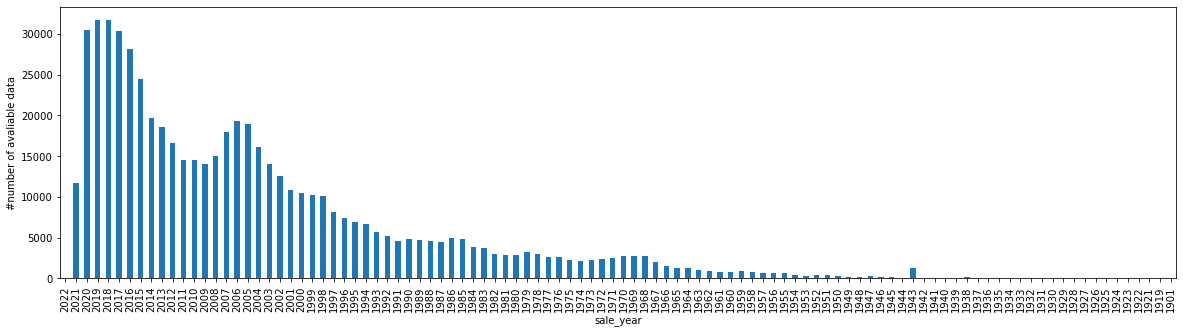

In [125]:
import datetime
pd.set_option("display.max_rows", None)
# data of sale for each year 
pd.to_datetime(data['sale_date']).dt.year.astype('Int64').value_counts().sort_index(ascending=False).plot(kind='bar',figsize=(20,5))

plt.xlabel('sale_year')
plt.ylabel('#number of avaliable data')
plt.show()                                                                                                          

Note: 
- consider the avaliable data for each year, we only analyze sale price between year 2010--2020
- Remember to delete outlier year 2200

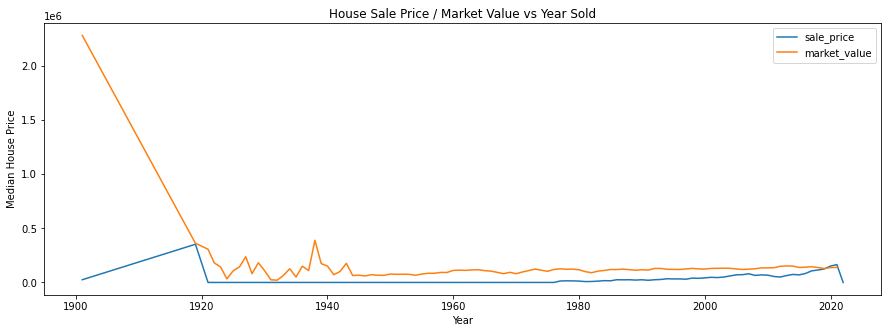

In [118]:
# median house price VS sale_data, built_date
# drop rows with outlier year 2200

# 1. sale_year
data['sale_year'] = pd.to_datetime(data['sale_date']).dt.year.astype('Int64')
data = data.drop(data[data.sale_year>2022].index)
data.groupby('sale_year')['sale_price'].median().plot(figsize=(15,5))
data.groupby('sale_year')['market_value'].median().plot()
plt.xlabel('Year')
plt.ylabel('Median House Price')
plt.title("House Sale Price / Market Value vs Year Sold")
plt.legend(['sale_price', 'market_value'])
plt.show()

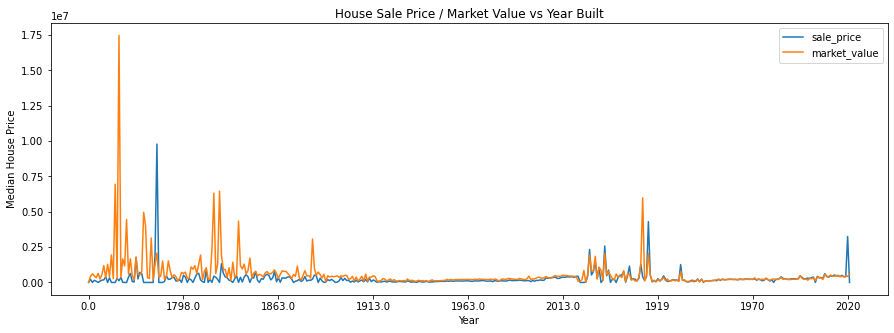

In [120]:
# 2. built_year
# drop outlier 196Y
data = data.drop(data.index[data['year_built'] == '196Y'])
data.groupby('year_built')['sale_price'].median().plot(figsize=(15,5))
data.groupby('year_built')['market_value'].median().plot()
# plt.ticklabel_format(useOffset = False)

plt.xlabel('Year')
plt.ylabel('Median House Price')
plt.title("House Sale Price / Market Value vs Year Built")
plt.legend(['sale_price', 'market_value'])
plt.show()

### 2.  `category_code_description`

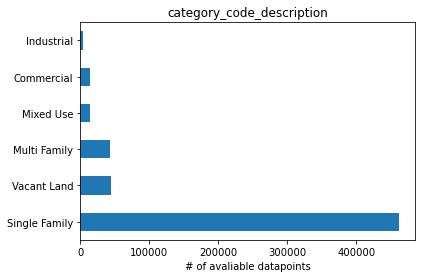

In [139]:
data.category_code_description.value_counts().plot(kind='barh')
plt.title('category_code_description')
plt.xlabel('# of avaliable datapoints')
plt.show()

- Single-Fmaily, Vacant Land and Multi-Fmaily took majority of data 
- We focus on "single Family" and "Multi Family" for analysis

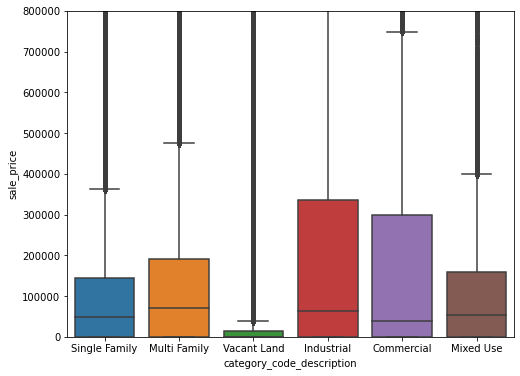

In [143]:
#box plot overallqual/salePrice
var = 'category_code_description'
price_type_analysis = pd.concat([data['sale_price'], data[var]], axis=1)
f, ax =plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='sale_price', data=price_type_analysis)
fig.axis(ymin=0, ymax=800000)
plt.show();

Note:
- each categories has sale_price of 0, which is unreasonable. We need to set a price range to extract reasonable datapoints.     

### `taxable_building`&`taxable_land`, `exempt_building`,&`exempt_land`

### After Data preprocessing:

In [128]:
All_data_EDA = pd.read_csv('../processing/All_data_EDA.csv')
All_data_EDA.head()

,Unnamed: 0,basements,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_spaces,garage_type,geographic_ward,house_number,interior_condition,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,sale_price,site_type,street_designation,topography,total_area,total_livable_area,type_heater,view_type,zip_code,lat,lng,sale_year,sale_month,sale_week,sale_dow,age,bath_total_ratio,bed_total_ratio,livable_area_ratio
0,0,full,Single Family,Y,94.00000,new,NaN,16.00000,NaN,NaN,29.00000,South or West,new,263000.00000,NaN,3.00000,10.00000,1.00000,263000.00000,NaN,ST,F,1542.00000,1242.00000,A,NaN,19121.00000,-75.17421,39.97913,2021,8,1,4,3.00000,NaN,0.30000,0.80545
1,1,None,Single Family,Y,0.00000,above average,0.00000,0.00000,0.00000,NaN,8.00000,North or East,above average,309800.00000,0.00000,0.00000,NaN,1.00000,272500.00000,NaN,ST,F,0.00000,524.00000,NaN,C,19103.00000,-75.17042,39.94925,2021,7,3,4,122.00000,NaN,NaN,1.01579
2,2,NaN,Single Family,Y,50.00000,new,NaN,NaN,NaN,NaN,31.00000,South or West,new,660000.00000,2.00000,3.00000,NaN,3.00000,655000.00000,NaN,AVE,F,800.00000,2499.00000,A,I,19125.00000,-75.12889,39.97867,2021,7,1,1,2.00000,NaN,NaN,3.12375
3,3,full,Single Family,Y,109.00000,new,0.00000,80.00000,NaN,NaN,21.00000,South or West,new,570400.00000,2.00000,3.00000,6.00000,2.00000,605950.00000,NaN,AVE,F,8219.00000,2716.00000,A,I,19128.00000,-75.23504,40.04562,2021,8,2,1,1.00000,0.33333,0.50000,0.33045
4,10,full,Single Family,Y,112.00000,new,0.00000,82.00000,NaN,NaN,21.00000,South or West,new,570400.00000,2.00000,3.00000,6.00000,2.00000,574380.00000,NaN,AVE,F,6424.00000,2716.00000,A,I,19128.00000,-75.23566,40.04581,2021,8,2,0,1.00000,0.33333,0.50000,0.42279


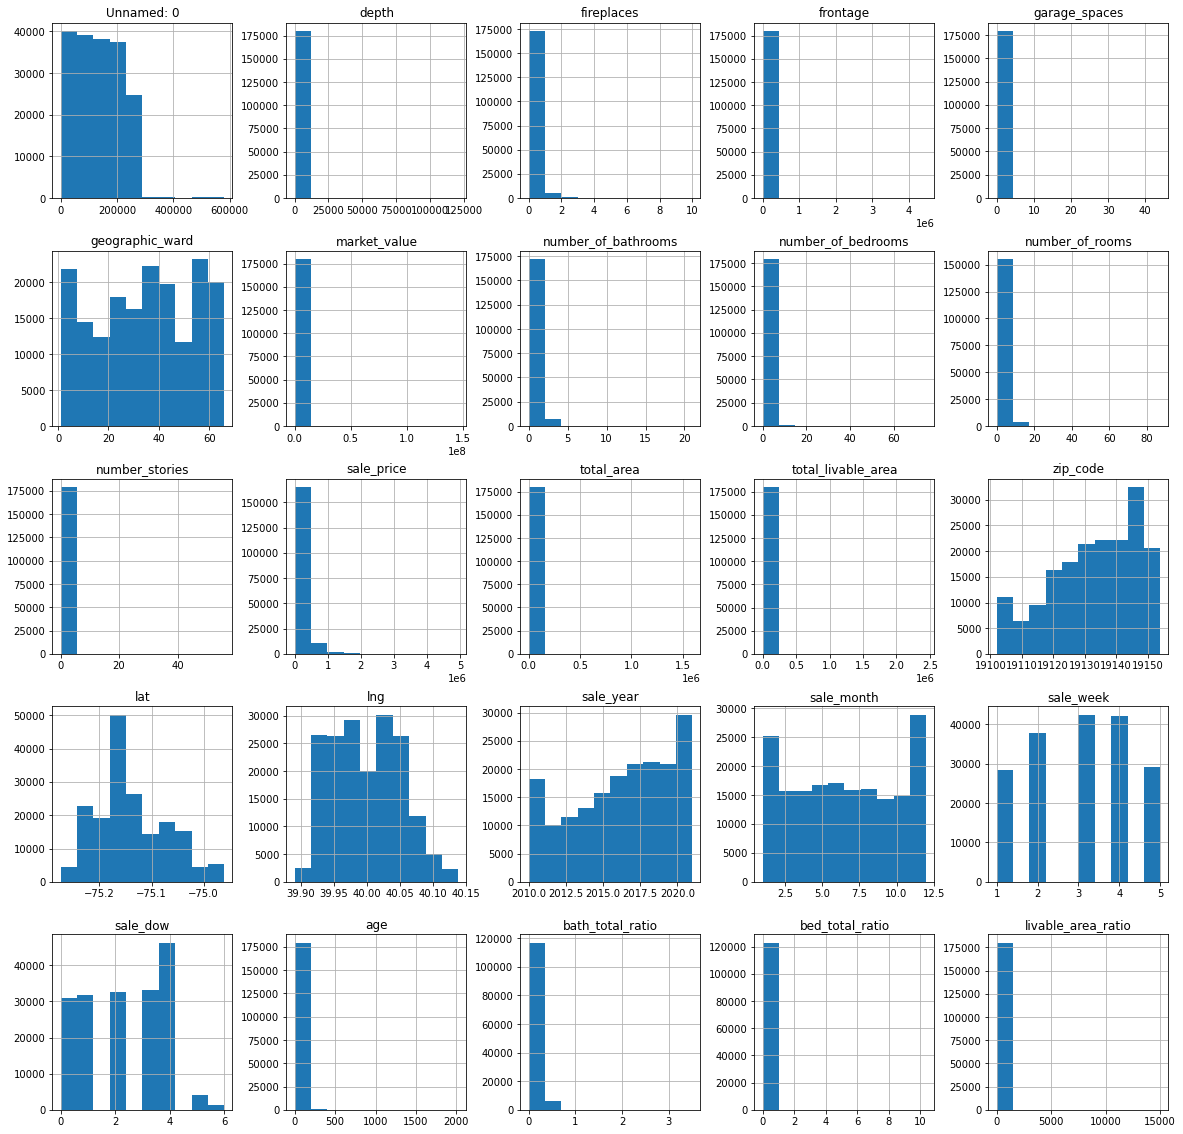

In [136]:
All_data_EDA.hist(figsize=(20,20))
plt.show()

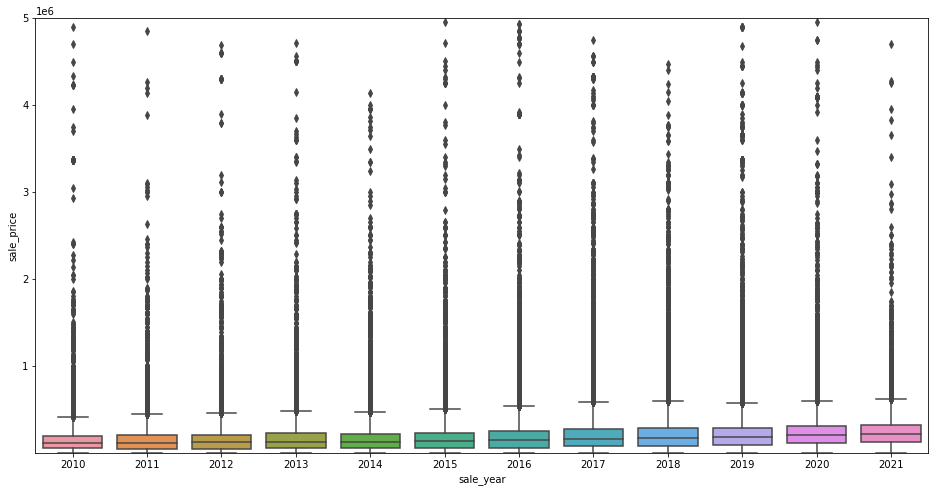

In [135]:
# sale price vs year 
sale_year  = 'sale_year'
analysis = pd.concat([All_data_EDA['sale_price'], All_data_EDA[var]], axis =1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=sale_year, y='sale_price', data=analysis)
fig.axis(ymin=1000, ymax=5000000)
plt.xticks(rotation=0)
plt.show()

Note: data is really poor and are not well-described by a normal distribution

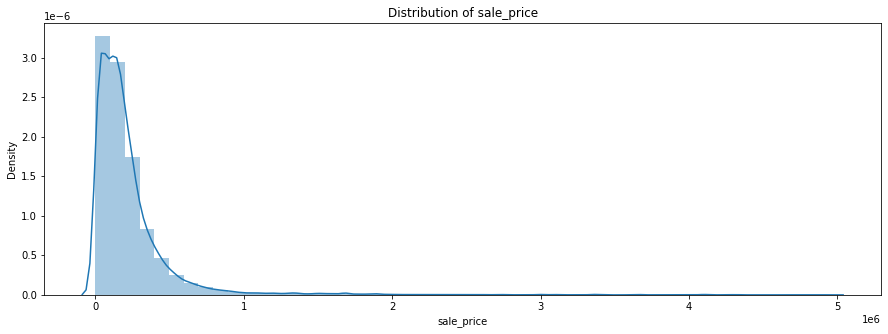

In [141]:
plt.figure(figsize=(15,5))
sns.distplot(All_data_EDA['sale_price'])
plt.title("Distribution of sale_price")
plt.xlabel("sale_price")
plt.show()

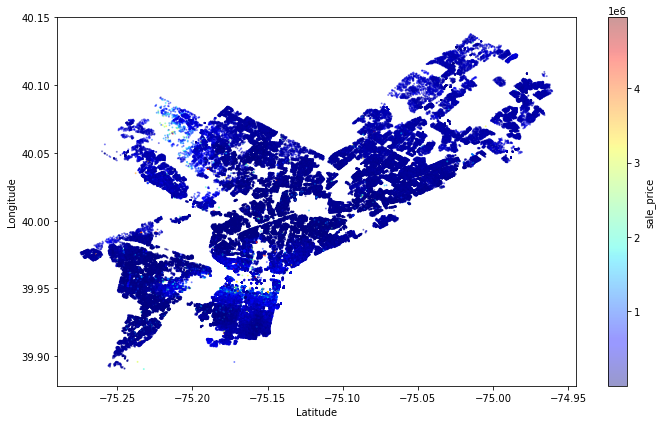

In [172]:
# Lat & Long 
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
#    s= housing['population']/100, label="population",

Geoplot = All_data_EDA.copy()
fig, ax = plt.subplots()
Geoplot.plot(kind="scatter", x="lat", y="lng",
    s= 1,ax=ax,
    c="sale_price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,6),
)
# plt.legend()
# save_fig("housing_prices_scatterplot")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.tight_layout()
plt.show()

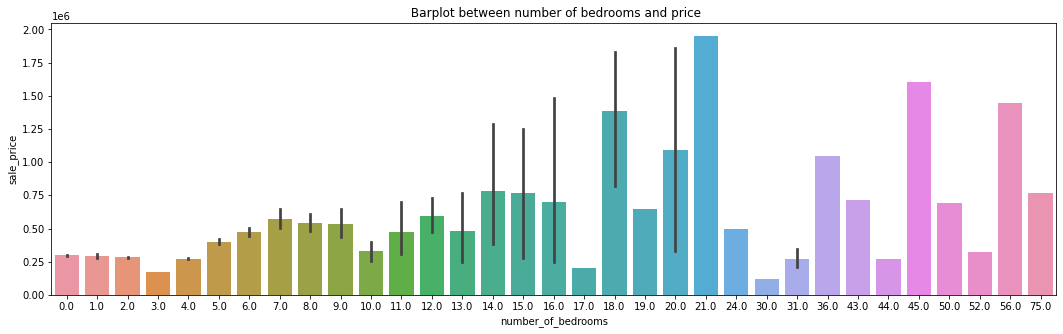

In [149]:
# BARPLOT BETWEEN NUMBER OF BEDROOMS AND PRICES
plt.figure(figsize=(18,5))
sns.barplot(x='number_of_bedrooms',y='sale_price',data=All_data_EDA)
plt.title(" Barplot between number of bedrooms and price")
plt.show()

Note: Not reasonable for number_of_bedrooms to be too large 

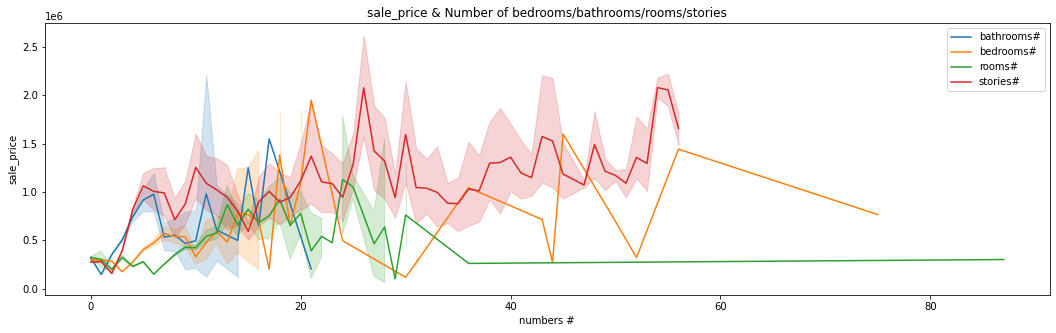

In [155]:
# BARPLOT BETWEEN NUMBER OF BEDROOMS AND PRICES
plt.figure(figsize=(18,5))
sns.lineplot(x='number_of_bathrooms',y='sale_price',data=All_data_EDA)
sns.lineplot(x='number_of_bedrooms',y='sale_price',data=All_data_EDA)
sns.lineplot(x='number_of_rooms',y='sale_price',data=All_data_EDA)
sns.lineplot(x='number_stories',y='sale_price',data=All_data_EDA)

plt.title("sale_price & Number of bedrooms/bathrooms/rooms/stories")
plt.xlabel('numbers #')
plt.legend(['bathrooms#', 'bedrooms#','rooms#','stories#'])
plt.show()


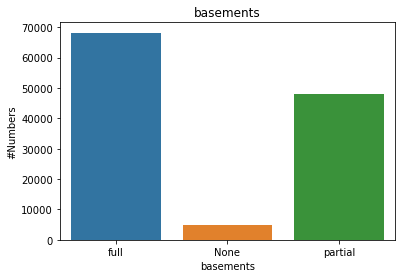

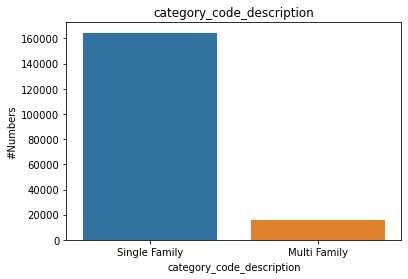

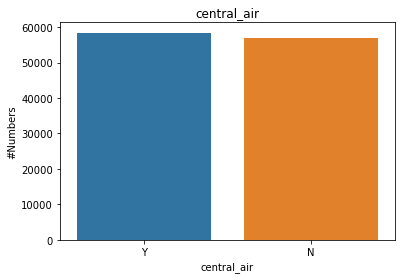

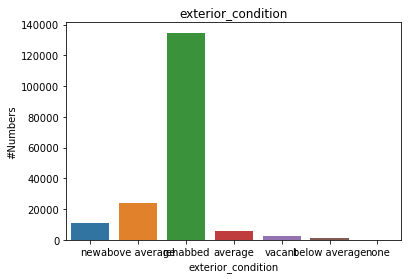

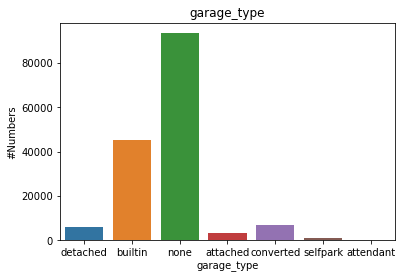

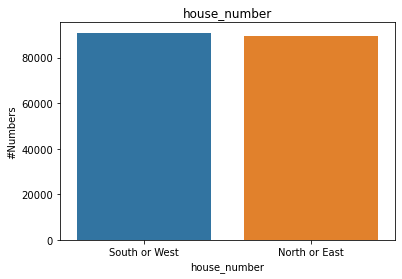

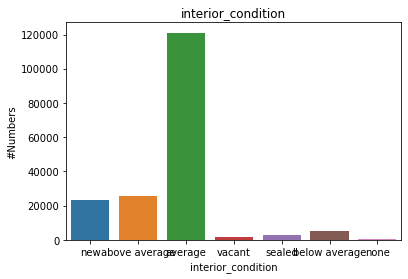

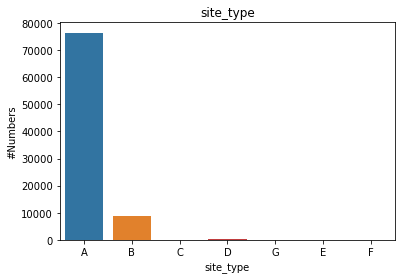

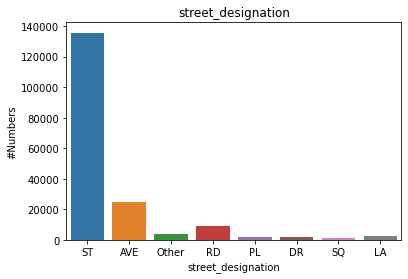

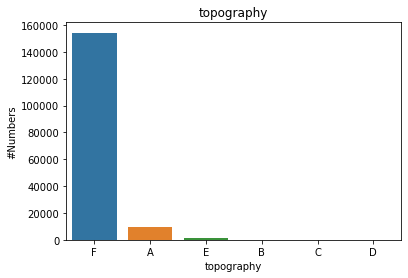

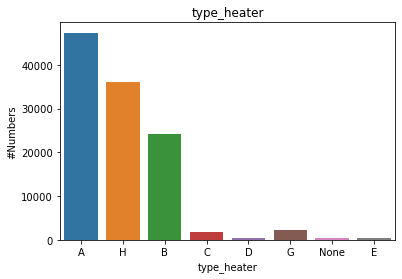

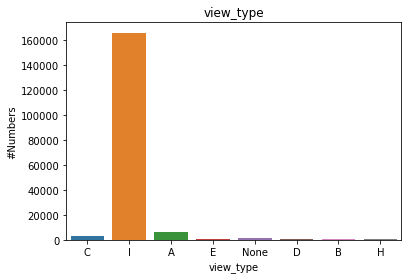

In [159]:
cat_features = ['basements', 'category_code_description', 'central_air', 'exterior_condition', 'garage_type', 
                'house_number','interior_condition', 'site_type','street_designation', 'topography', 
                'type_heater', 'view_type']

for feature in cat_features:
    ax = sns.countplot(x=feature, data=All_data_EDA)
    #ax.set_title(f'number for each categories in {feature}')
    ax.set_title(feature)
    plt.xlabel(feature)
    plt.ylabel('#Numbers')
    plt.show()